In [15]:
from sklearn.datasets import fetch_lfw_people
from skimage.feature import hog
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns


# Loading and preprocessing the LFW dataset
lfw_people = fetch_lfw_people(min_faces_per_person=40, resize=0.4)
X = lfw_people.images
y = lfw_people.target

# Extracting HOG features
hog_features = []
for image in X:
    features, hog_image = hog(image, orientations=9, pixels_per_cell=(4,4),
                               cells_per_block=(2,2), visualize=True)
    hog_features.append(features)

# Splitting
X_hog = np.array(hog_features)
y = lfw_people.target
X_train, X_test, y_train, y_test = train_test_split(X_hog, y, test_size=0.15, random_state=42)
print("HOG Features :",X_train.shape)


HOG Features : (1510, 3168)


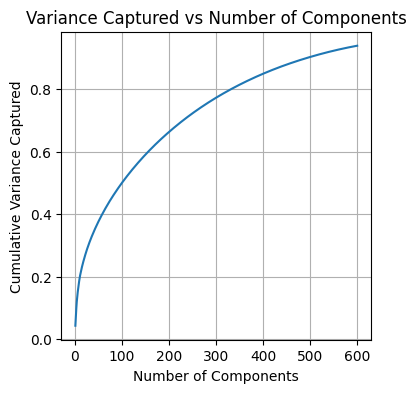

In [16]:
# Applying PCA on HOG features
n_components = 600
pca = PCA(n_components=n_components)
X_train_projected = pca.fit_transform(X_train)
X_test_projected = pca.transform(X_test)

cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Plotting variance captured vs components
plt.figure(figsize=(4, 4))
plt.plot(range(1, pca.n_components_ + 1), cumulative_variance_ratio, linestyle='-')
plt.title('Variance Captured vs Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Captured')
plt.grid(True)
plt.show()

### Logistic Regression model

In [17]:
from sklearn.linear_model import LogisticRegression

Accuracy of Logistic Regression:  0.8651685393258427


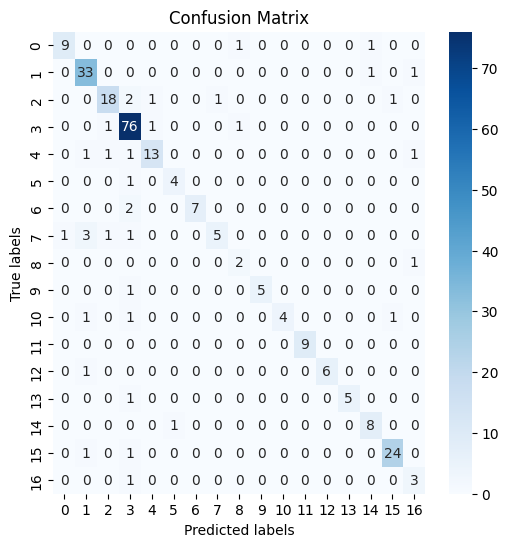

In [20]:
model = LogisticRegression(max_iter = 2000)
model.fit(X_train_projected, y_train)
y_test_pred = model.predict(X_test_projected)
print("Accuracy of Logistic Regression: ",model.score(X_test_projected, y_test))

## Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d',
            xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()